<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Milena Waichman Scigliano


# Introduccion

En este primer trabajo la idea era generar una variedad de señales y con distintas herramientas buscar relaciones entre ellas, ademas de calcular su energia o potencia dependiendo del caso. En este informe vamos a ver como se generaron las señales con Python. Hablaremos un poco de los conceptos de ortogonalidad y correlacion, y como fueron aplicados a las señales creadas. Luego verificaremos una identidad trigonometrica y porque es importante su aplicacion en este caso. Finalmente calcularemos y graficaremos la energia de una señal generada por un sonido. Ademas de resolver el trabajo practico se mencionaran los conceptos teoricos utilizados para resolverlo y explicar porque suceden ciertos fenomenos.

# 1) Sintesis y grafico de señales

Para este primer punto se pidio generar seis señales distintas, graficarlas e indicar para cada una de ellas el tiempo entre muestras, el numero de muestras y la potencia o energia segun correspondiese. Para generar cada una de estas funciones se usaron distintas funciones de las librerias numpy y scipy de Python. Desde un principio se fijo un numero de muestras $(N = 700)$ y una frecuencia de muestreo $(fs = 50KHz)$ que aplica a todas las señales. Ademas se definio un array de tiempo para asegurarnos que todas las señales queden definidas en un mismo intervalo, lo que nos va a facilitar las cosas para el punto 2) y 3) del trabajo.

P=  0.5000000000000004
P=  0.4999999999999995
P=  0.2500000000000002
P=  0.37074028890091376
P=  1.0
E=  500.0


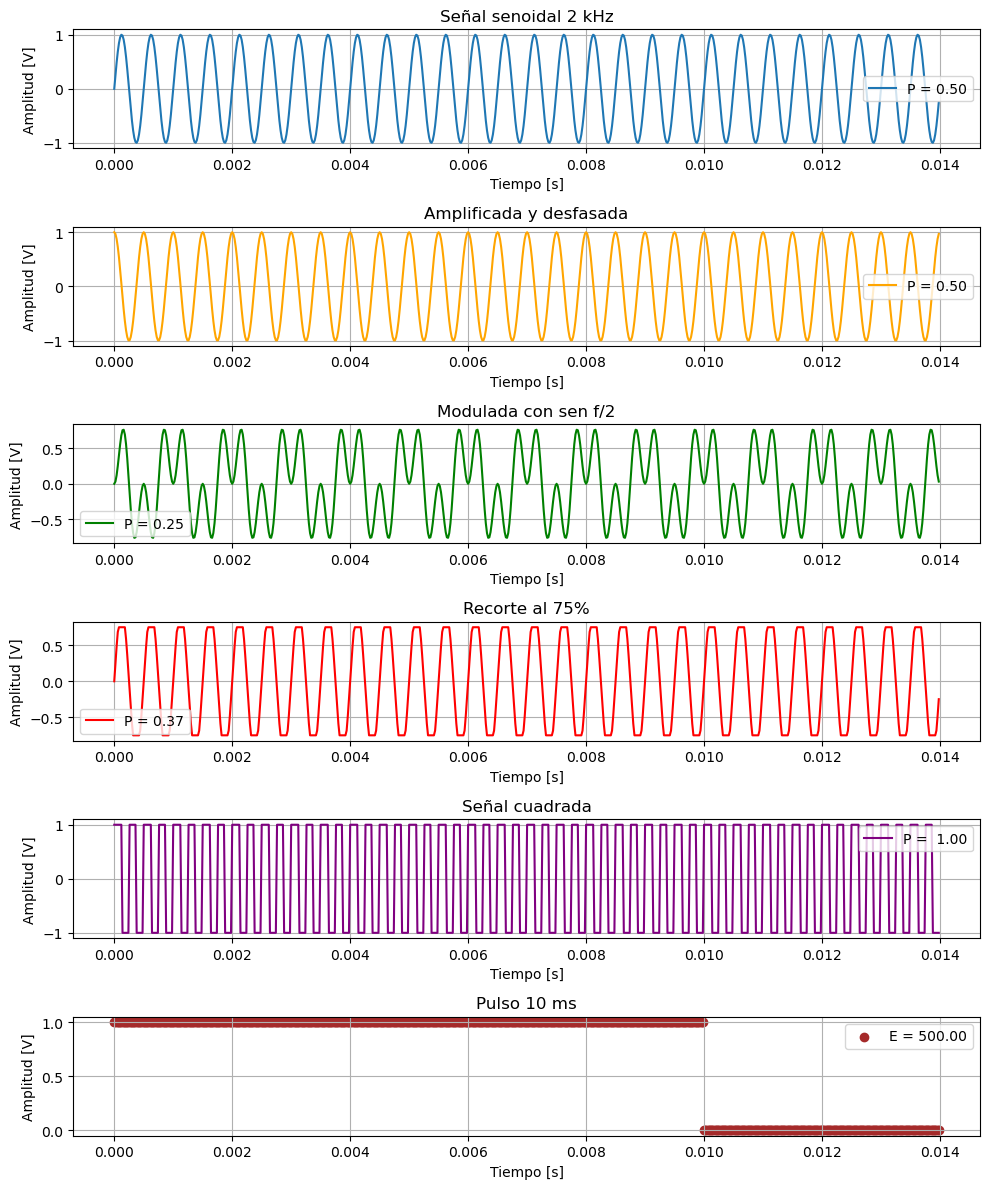

In [30]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
from scipy import signal
from scipy.io import wavfile

fs = 50000 # frecuencia de muestreo, aplica para todas las señales
N = 700  # cantidad de muestras, aplica para todas las señales 
fx = 2000 #frecuencia para las senoidales
Ts = 1/fs
t = np.arange(N) * Ts # crea el array de tiempo que se usa en todas las señales

def mi_funcion_sen (A0, fx, phase, t ):
    x = A0 * np.sin(2 * np.pi * fx * t + phase)
    return x

def funcion_cuadrada (fcuad):
    x = signal.square(2 * np.pi * fcuad * t)
    return x

def pulsos(t, T):
    pulso = np.where(t < T, 1.0, 0.0)
    return pulso

#señal original
x_senoidal = mi_funcion_sen(A0 = 1, fx = fx, phase = 0, t = t)
potencia_x1 = np.mean((x_senoidal) ** 2)
print("P= ", potencia_x1)

#señal desfazada
x_desfazada = mi_funcion_sen(A0 = 1, fx = fx, phase = np.pi/2, t = t)
potencia_x2 = np.mean((x_desfazada) ** 2)
print("P= ", potencia_x2)

#señal modulada con una de la mitad de su frecuencia
x_aux = mi_funcion_sen(A0 = 1, fx = fx/2, phase = 0, t = t)
x_modulada = x_senoidal * x_aux
potencia_x3 = np.mean((x_modulada) ** 2)
print("P= ", potencia_x3)

#señal recortada al 75%
x_recortada = np.clip(x_senoidal, -0.75, 0.75, out=None)
potencia_x4 = np.mean((x_recortada) ** 2)
print("P= ", potencia_x4)

#señal cuadrada 4KHz
x_cuadrada = funcion_cuadrada(fcuad = 4000)
potencia_x5 = np.mean((x_cuadrada) ** 2)
print("P= ", potencia_x5)

#pulso de 10ms
x_pulsos = pulsos(t, 0.01)
energia_x6 = np.sum((x_pulsos) ** 2)
print("E= ", energia_x6)

#Graficos
fig, axs = plt.subplots(6, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Señal senoidal
axs[0].plot(t, x_senoidal,label = f"P = {potencia_x1:.2f}")
axs[0].set_title("Señal senoidal 2 kHz")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud [V]")
axs[0].legend()
axs[0].grid(True)

# Amplificada y desfasada
axs[1].plot(t, x_desfazada,label = f"P = {potencia_x2:.2f}", color="orange")
axs[1].set_title("Amplificada y desfasada")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud [V]")
axs[1].legend()
axs[1].grid(True)

# Modulacion en amplitud
axs[2].plot(t, x_modulada,label = f"P = {potencia_x3:.2f}", color="green")
axs[2].set_title("Modulada con sen f/2")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud [V]")
axs[2].legend()
axs[2].grid(True)

# Señal recortada
axs[3].plot(t, x_recortada,label = f"P = {potencia_x4:.2f}", color="red")
axs[3].set_title("Recorte al 75%")
axs[3].set_xlabel("Tiempo [s]")
axs[3].set_ylabel("Amplitud [V]")
axs[3].legend()
axs[3].grid(True)

# Señal cuadrada
axs[4].plot(t, x_cuadrada,label = f"P = {potencia_x5: .2f}", color="purple")
axs[4].set_title("Señal cuadrada")
axs[4].set_xlabel("Tiempo [s]")
axs[4].set_ylabel("Amplitud [V]")
axs[4].legend()
axs[4].grid(True)

# Pulso rectangular
axs[5].scatter(t, x_pulsos,label = f"E = {energia_x6:.2f}", color="brown", marker="o")
axs[5].set_title("Pulso 10 ms")
axs[5].set_xlabel("Tiempo [s]")
axs[5].set_ylabel("Amplitud [V]")
axs[5].legend()
axs[5].grid(True)

# Ajustar todo
plt.tight_layout()
plt.show()



Como se puede ver en los graficos de arriba, tenemos distintos tipos de señales. Al compartir la frecuencia de muestreo y el numero de muestras hay algunas señales que no se ven con tanta claridad, pero se eligieron los parametros de forma que todo quedara lo mas claro posible.
En cuanto a la energia y la potencia es importante resaltar la diferencia entre ambos conceptos, y porque aplica uno o el otro segun la señal sobre la que se este trabajando. 
La energía mide “cuánta fuerza total” tiene la señal si la observás toda junta y se calcula de la siguiente forma:

$$ E= \int_{-\infty}^{\infty} |x(t)|^2 dt $$

La potencia mide “cuánta fuerza promedio” tiene por unidad de tiempo si la señal es infinita y su formula es:

$$ P= \lim_{T \to \infty} \frac{1}{2T}\int_{-T}^{T} |x(t)|^2 dt $$

En el mundo discreto, donde estamos operado en este momento, si la señal es de duracion finita hablamos de energia pero si es de tipo infinita o periodica hablamos de su potencia. Teniendo en cuenta para las primeras cinco señales se calculo su potencia y para el pulso se calculo su energia.

# 2) Ortogonalidad

En el siguiente punto habia que verificar si la primera señal generada era ortogonal con las otras cinco. Dos funciones son ortogonales si su producto interno es cero. En el caso discreto se define de la siguiente forma:
$$ <x,y> =\sum_{n=0}^{N} x[n]\cdot y[n]=0 $$
La ortogonalidad me permite ver si las señales se interfieren entre si. Usando python se calculo la ortogonalidad, en mi caso ademas de verificar ortogonalidad normalice la ortogonalidad para asegurarme que el resultado no dependa de la amplitud. Ya que hay casos donde dos funciones son ortogonales pero al variar la amplitud el producto interno deja de dar cero y puede generar confusion.

In [13]:
def fun_ortogonalidad(x, y):
    numerador = np.sum(x*y) ##aca ya sabe que el vector tiene N elementos, entonces suma desde n=0 hasta N-1.
    denominador = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)) # aca normalizo cada señal
    return numerador/denominador


print("señal principal vs x1 (desfasada pi/2):", fun_ortogonalidad(x_senoidal, x_desfazada))
print("señal principal vs x2 (modulada):", fun_ortogonalidad(x_senoidal, x_modulada))
print("señal principal vs x3 (clipeada en amplitud):", fun_ortogonalidad(x_senoidal, x_recortada))
print("señal principal vs x4 (cuadrada de 4kHz):", fun_ortogonalidad(x_senoidal, x_cuadrada))
print("señal principal vs pulso:", fun_ortogonalidad(x_senoidal,x_pulsos))

señal principal vs x1 (desfasada pi/2): 5.030261921287352e-15
señal principal vs x2 (modulada): -8.900181251510305e-16
señal principal vs x3 (clipeada en amplitud): 0.9936273510079011
señal principal vs x4 (cuadrada de 4kHz): 0.053121397265726636
señal principal vs pulso: -1.4437437100898393e-16


Como se ve en los resultado de arriba podemos ver que todas las señales excepto la recortada y la cuadrada son ortogonales con la senoidal principal. En alguno casos como podria ser la señal modulada, la ortogonalidad estas ligada la frecuencia de muestreo y al numero de muestras. Si estos datos se modificaran, la ortogonalidad podria verse afectada. En el caso de la señal cuadrada solo algunos armónicos podrían ser ortogonales a la senoidal, pero no la señal completa.

# 3) Autocorrelacion y correlacion

La correlacion compara el parecido entre dos señales y se define de la siguiente forma:
$$ R_{xy}[k]= \sum_{n=0}^{N} x[n]\cdot y[n+k] $$
Esto me permite detectar si una señal conocida aparece dentro de otra y encontrar retardos o desfases entre señales. En el caso especial de la autocorrelacion, que es comparar una señal consigo misma, permite detectar periodicidades en una señal y medir la energía de una señal.

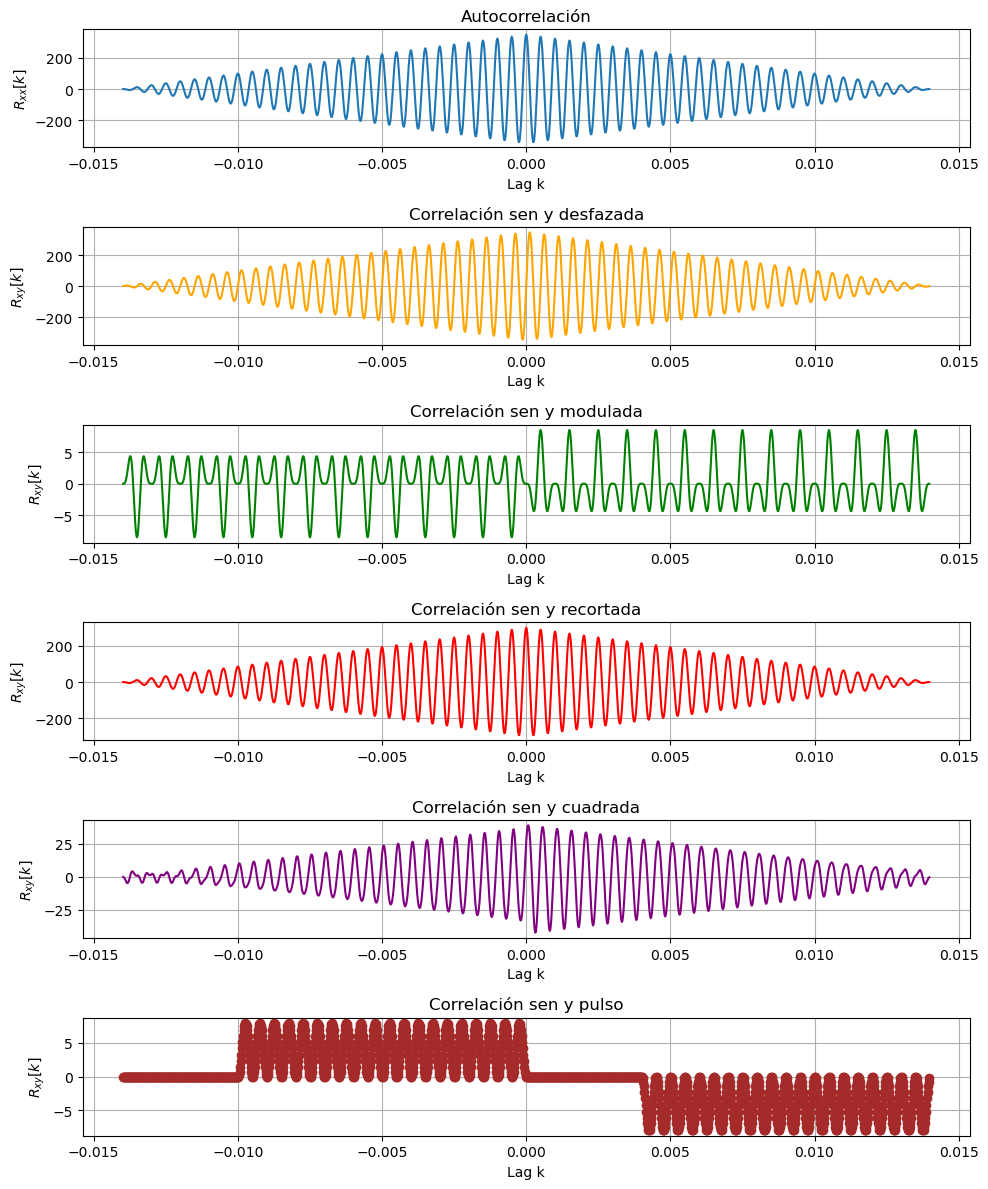

In [25]:
x0 = np.correlate(x_senoidal, x_senoidal,  mode="full")
x1 = np.correlate(x_senoidal, x_desfazada, mode="full")
x2 = np.correlate(x_senoidal, x_modulada, mode="full")
x3 = np.correlate(x_senoidal, x_recortada, mode="full")
x4 = np.correlate(x_senoidal, x_cuadrada, mode="full")
x5 = np.correlate(x_senoidal, x_pulsos, mode="full")

lags = np.arange(-N+1, N)         # retardos en muestras
lags_t = lags * Ts

fig, axs = plt.subplots(6, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Autocorrelación
axs[0].plot(lags_t, x0)
axs[0].set_title("Autocorrelación")
axs[0].set_xlabel("Lag k")
axs[0].set_ylabel("$R_{xx}[k]$")
axs[0].grid(True)

# Correlación sen y desfazada
axs[1].plot(lags_t, x1, color="orange")
axs[1].set_title("Correlación sen y desfazada")
axs[1].set_xlabel("Lag k")
axs[1].set_ylabel("$R_{xy}[k]$")
axs[1].grid(True)

# Correlación sen y modulada
axs[2].plot(lags_t, x2, color="green")
axs[2].set_title("Correlación sen y modulada")
axs[2].set_xlabel("Lag k")
axs[2].set_ylabel("$R_{xy}[k]$")
axs[2].grid(True)

# Correlación sen y recortada
axs[3].plot(lags_t, x3, color="red")
axs[3].set_title("Correlación sen y recortada")
axs[3].set_xlabel("Lag k")
axs[3].set_ylabel("$R_{xy}[k]$")
axs[3].grid(True)

# Correlación sen y cuadrada
axs[4].plot(lags_t, x4, color="purple")
axs[4].set_title("Correlación sen y cuadrada")
axs[4].set_xlabel("Lag k")
axs[4].set_ylabel("$R_{xy}[k]$")
axs[4].grid(True)

# Correlación sen y pulso
axs[5].plot(lags_t, x5, color="brown", marker="o")
axs[5].set_title("Correlación sen y pulso")
axs[5].set_xlabel("Lag k")
axs[5].set_ylabel("$R_{xy}[k]$")
axs[5].grid(True)

plt.tight_layout()
plt.show()


A partir del codigo se calculo y grafico la correlacion entre las seis señales. En el caso de la autocorrelacion podemos resaltar como el pico maximo expresa la energia de la señal y se encuentra justo en cero y la simetria del grafico indica el parecido perfecto, ya que se esta comparando una señal consigo misma. En el segundo grafico afianzamos el concepto de ortogonalidad ya que los pequeños picos en retardos distintos muestran similitud parcial cuando se desplaza la señal y esto confirma que señales desfasadas $\pi/2$ son prácticamente ortogonales. La comparacion con la modulada muestra poca similitud, a eso se deben la variedad de picos. En el caso de la recortada vemos mucha similitud con la autocorrelacion, esto es por señales casi identicas, el recorte solamente reduce un poco los picos. La correlacion con la cuadrada tiene cambios mas bruscos debido a su naturaleza no senoidal, lo que no cancela por completo lo extremos positivos y negativos. Finalmente el pulso podemos ver como coincide solo en algunas partes que eso donde hay energia.



# 4) Demostracion trigonometrica

En este punto se pide demostrar la siguiente propiedad trigonometrica:
$$ 2sin(\alpha)\cdot sin(\beta)=cos(\alpha - \beta)-cos(\alpha+\beta)$$
Sabiendo las propiedades basicas de suma y resta del coseno
$$cos(A+B)=cos(A)\cdot cos(B)-sin(A)\cdot sin(B)$$
$$cos(A-B)=cos(A)\cdot cos(B)+sin(A)\cdot sin(B)$$
Reemplazando los cosenos usando las propiedades
$$2sin(\alpha)\cdot sin(\beta)=cos(\alpha)\cdot cos(\beta)+sin(\alpha)\cdot sin(\beta)-cos(\alpha)\cdot cos(\beta)+sin(\alpha)\cdot sin(\beta)$$
Los cosenos se cancelan entre si y los senos se suman
$$2sin(\alpha) \cdot sin(\beta)=2sin(\alpha)\cdot sin(\beta)$$

Ahora considerando que $\alpha=\omega t$ y $\beta=\alpha/2=\frac{\omega t}{2}$ reemplazo en la identidad trigonometrica
$$ 2sin(\omega t)\cdot sin(\frac{\omega t}{2})=cos(\omega t - \frac{\omega t}{2})-cos(\omega t+\frac{\omega t}{2})$$


In [22]:
w = 2 * np.pi * fs
identidad = 2 * np.sin(w * t / 2) * np.sin(w * t / 2) - np.cos(w * t / 2) + np.cos(w * t * 3 / 2)
if np.allclose(identidad, 0, atol = 1e-12):
    print("La identidad se cumple para cualquier frecuencia w")
    print("La igualdad para cualquier f es: ", np.sum(identidad))
else:
    print("No se cumple la propiedad (el resultado es distinto de 0)")
    print(identidad)

La identidad se cumple para cualquier frecuencia w
La igualdad para cualquier f es:  0.0


En el codigo se creo una variable *identidad* para demostrar si la igualdad da cero y verificar que se cumple la propiedad para cualquier frecuencia. Se uso la funcion **np.allclose** de numpy que permite poner una tolerancia, de modo que si el calculo da un valor cercano al deseado sin superar ese limite, se redondea, a cero en nuestro caso. Como frecuencia de prueba se uso la frecuencia de muestreo declarada al principio del informe.

# Bonus

La consigna pedia descargar un wav, graficarlo y calcular su energia. Yo elegi un wav de tipo mono de duracion 15 segs. https://freesound.org/people/HenryTheGuy/sounds/822458/ 

Energía del sonido: 622402509


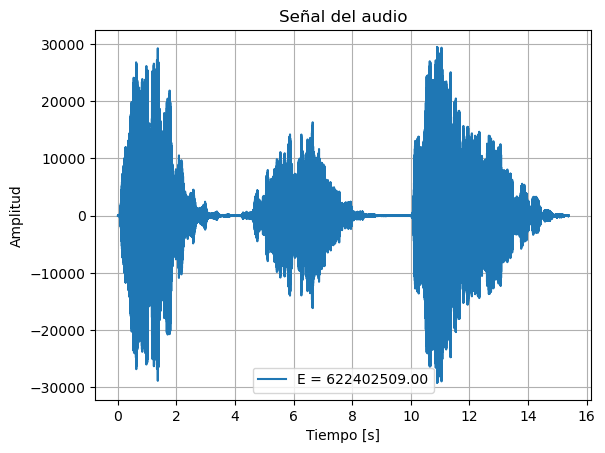

In [24]:
fs, data = wavfile.read("sonido.wav")

# Vector de tiempo
tt = np.arange(len(data)) / fs

# Energía
energia_sonido = np.sum(data**2)
print("Energía del sonido:", energia_sonido)

plt.figure()
plt.plot(tt, data, label = f"E = {energia_sonido:.2f}")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal del audio")
plt.legend()
plt.grid(True)
plt.show()


La energia fue calculada con la misma formula del punto 1. Para analizar esta señal se obtuvo con la funcion **wavfile.read** la frecuencia de muestreo y la informacion en forma de vector, al ser mono mi vector de datos tiene una sola columna, lo que me permitio usarlo directamente. Anteriormente probe resolver este ejercicio con un audio de tipo estereo que devuelve un array de datos en dos columnas, por lo que para operar con el hay que convertirlo. Como el proceso me parecio muy engorroso, cambie por un audio de tipo mono. Se genero un nuevo vector de tiempo a partir de la cantidad de muestras y la frecuencia obtenida.
El valor obtenido esta en el orden de $10^8$ lo que es acorde a la señal analizada, teniendo en cuenta su duracion y el tipo de audio.

# Conclusion

Este trabajo practico me llevo bastante tiempo de resolver, primero por no comprender del todo las consignas y luego por el tiempo que tuve que dedicarle a desarrollar el codigo. La variedad de consignas me ayudo a comprender mejor algunos de los temas vistos en clase y tambien a programar con python. Para resolver los puntos del trabajo use muchas funciones nuevas, tanto para generar señales como para graficar.
Pude sacar varias conclusiones de los cinco puntos, como se mencionan en cada uno de los apartados, lo que me ayudo a afianzar los conceptos teoricos. Todavia me quedan algunas dudas sobre ortogonalidad y correlacion, pero creo que logre entender lo suficiente como para poder analizar los resultados que obtuve.

## Autoevaluacion

*Indicar una opción (marcada con negrita):*

Resolví la tarea con seguridad
**Resolví la tarea, pero tengo dudas** 
Resolví la tarea,pero no entendí bien
No pude resolverla y no entendí
Responder:

*¿Qué aprendiste al hacer esta tarea?*

En esta tarea pude aprender a generar distintos tipos de señales y analizar ortogonalidad y correlacion entre ellas. Pude ver como se comporta cada una de estas señales y que similitudes comparten. Aprendi a calcular potencia y energia. Tambien como graficar una señal de audio.

*¿Qué te quedó claro? ¿Qué te sigue costando?*

Todavia tengo algunas dudas con los conceptos de ortogonalidad y correlacion. En el caso de correlacion hice una analisis detallado de cada uno de los casos con ayuda de ChatGPT, pero no estoy segura si esta correcto.

*Indicar si se utilizó IA:*

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**
No usé IA.
*En caso afirmativo, indicar una opción o varias:*

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones